<h1>Tugas Data Mining 2</h1>
<br />
<ul>
    <li><b>Nama  : Al-Fariqy Raihan Azhwar</b></li>
    <li><b>NPM   : 202143501514</b></li>
    <li><b>Kelas : R6Q</b></li>
</ul>
<br />

<h3>Import Liblary</h3>

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
from xgboost import XGBClassifier
from warnings import filterwarnings
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    StandardScaler
)

filterwarnings('ignore')

In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv \
  -P datasets
!pwd

--2024-03-23 11:59:57--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘datasets/titanic.csv.1’

titanic.csv.1       100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-03-23 11:59:58 (4.62 MB/s) - ‘datasets/titanic.csv.1’ saved [60302/60302]

/content


<h3>Read DataFrame</h3>

In [ ]:
titanic_dataframe = pd.read_csv("./datasets/titanic.csv")
titanic_dataframe.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3>Get DataFrame Information</h3>

In [ ]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_dataframe.shape

(891, 12)

In [ ]:
titanic_dataframe.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<h3>Search for and Clean missing values</h3>

In [ ]:
titanic_dataframe.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

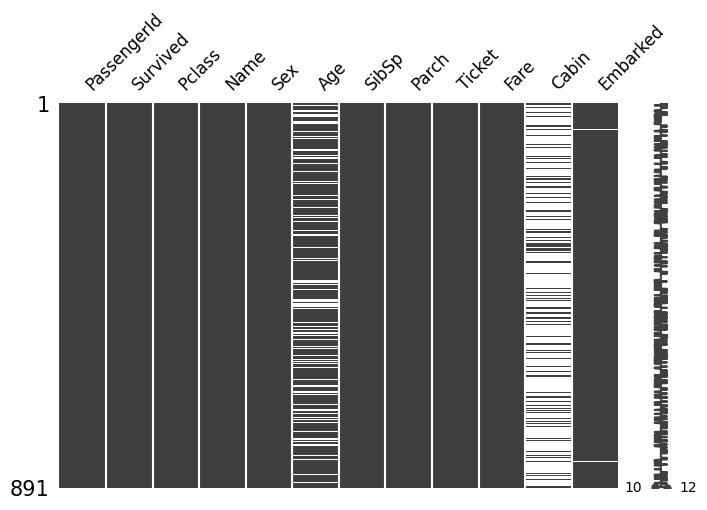

In [ ]:
msno.matrix(
    titanic_dataframe,
    figsize  = (8, 5),
    fontsize = 12
)

<Axes: >

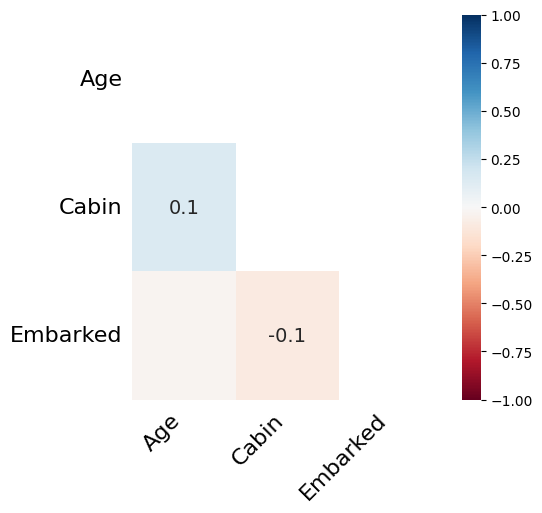

In [ ]:
msno.heatmap(
    titanic_dataframe,
    labels  = True,
    figsize = (5, 5),
    cmap    = 'RdBu'
)

In [ ]:
missing_col_names = [
    col for col, _ in titanic_dataframe.to_dict().items() \
    if titanic_dataframe[col].isnull().sum() > 0
]

print(missing_col_names)

['Age', 'Cabin', 'Embarked']


In [ ]:
total = titanic_dataframe.shape[0]

for col_name in missing_col_names:
  null_values = titanic_dataframe[col_name].isnull().sum()
  print(f"{col_name}: {(null_values / total) * 100} Percent")

Age: 19.865319865319865 Percent
Cabin: 77.10437710437711 Percent
Embarked: 0.22446689113355783 Percent


<Axes: >

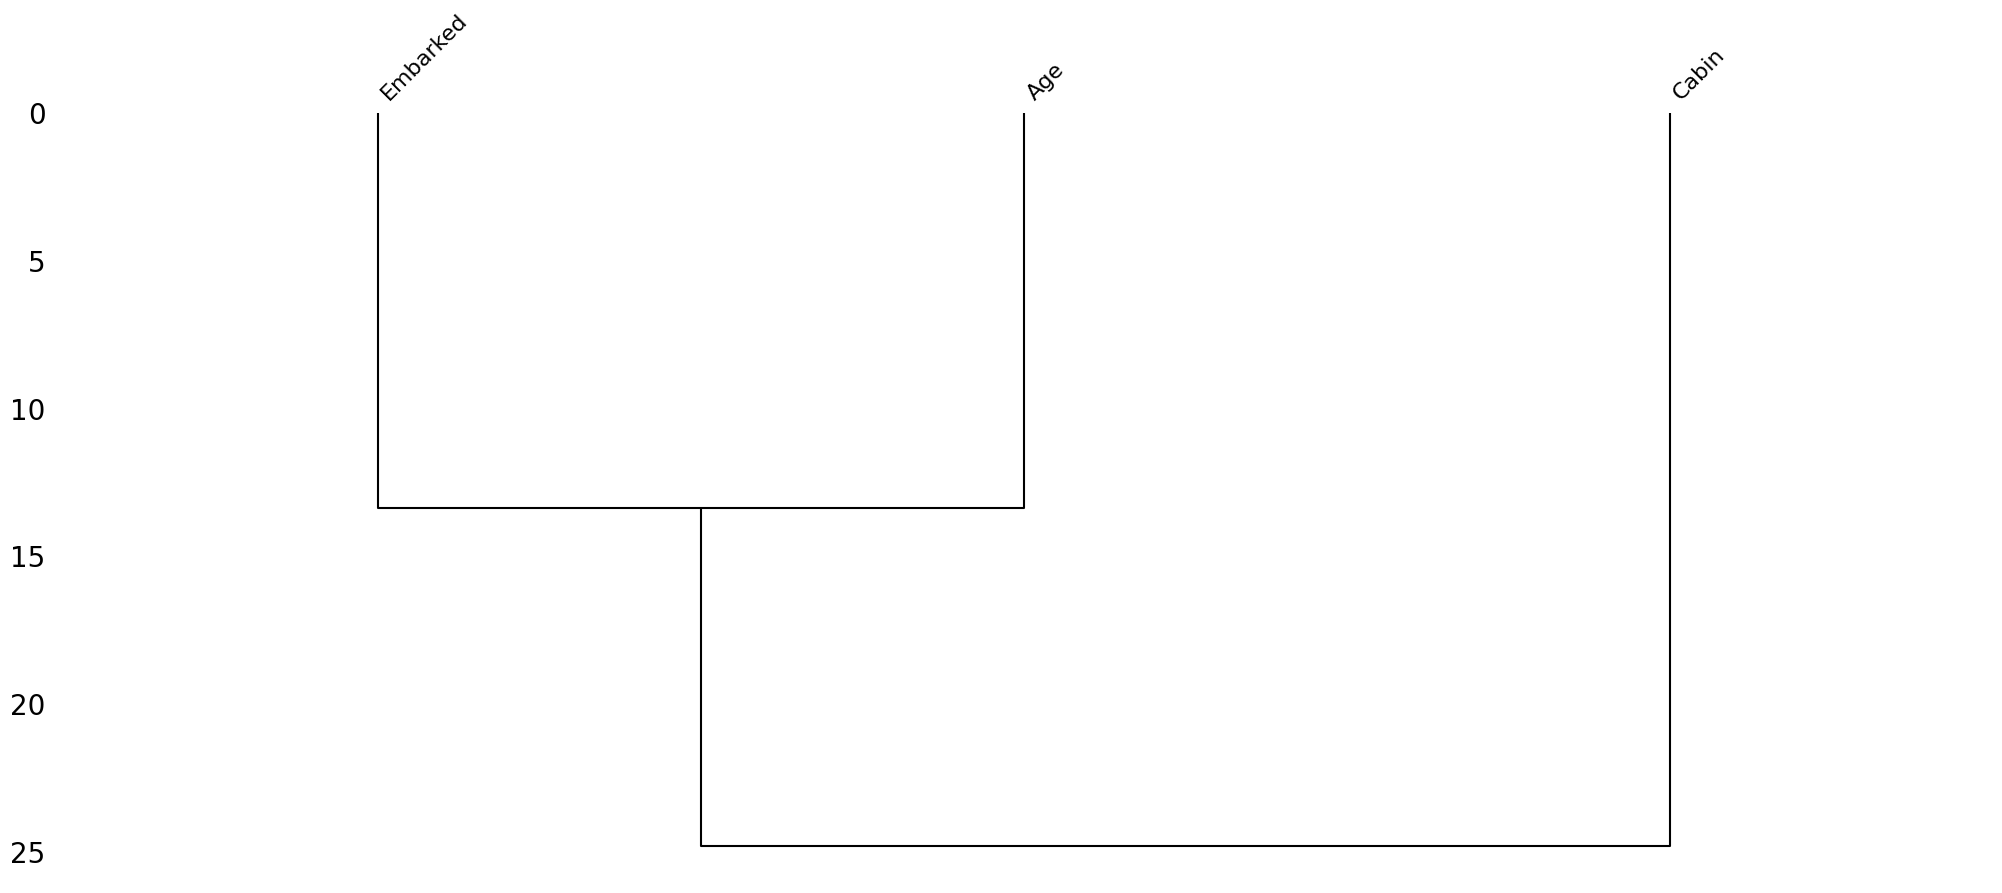

In [ ]:
msno.dendrogram(titanic_dataframe[missing_col_names])

In [ ]:
for col_name, val in titanic_dataframe.isna().sum().to_dict().items():
    if val > 0:
        first_val = titanic_dataframe[col_name].dropna().iloc[0]
        if type(first_val).__name__ == 'str':
            titanic_dataframe[col_name].fillna(
                value = titanic_dataframe[col_name].value_counts().idxmax(),
                inplace = True
            )
        else:
            avg = titanic_dataframe[col_name].mean()
            titanic_dataframe[col_name] = titanic_dataframe[col_name].fillna(avg)

titanic_dataframe.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Data Transformation (Normalization and Standarization)</h3>

In [ ]:
col_names : list = ['Age', 'SibSp', 'Parch', 'Fare']
scalers   : dict = {'Normalization': MinMaxScaler(), 'Standarization': StandardScaler()}

for s_name, s_obj in scalers.items():
    transform = s_obj.fit_transform(titanic_dataframe[col_names])
    print(f"| {s_name} |\n|{', '.join(col_names)}|\n{transform}\n\n")

| Normalization |
|Age, SibSp, Parch, Fare|
[[0.27117366 0.125      0.         0.01415106]
 [0.4722292  0.125      0.         0.13913574]
 [0.32143755 0.         0.         0.01546857]
 ...
 [0.36792055 0.125      0.33333333 0.04577135]
 [0.32143755 0.         0.         0.0585561 ]
 [0.39683338 0.         0.         0.01512699]]


| Standarization |
|Age, SibSp, Parch, Fare|
[[-0.5924806   0.43279337 -0.47367361 -0.50244517]
 [ 0.63878901  0.43279337 -0.47367361  0.78684529]
 [-0.2846632  -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 0.          0.43279337  2.00893337 -0.17626324]
 [-0.2846632  -0.4745452  -0.47367361 -0.04438104]
 [ 0.17706291 -0.4745452  -0.47367361 -0.49237783]]




<h3>Training data using XGBoost Algorithm (additional)</h3>

In [ ]:
encoder: LabelEncoder = LabelEncoder()
features: list = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

x = titanic_dataframe[features]
y = titanic_dataframe['Survived']

x['Sex']      = encoder.fit_transform(x['Sex'])
x['Embarked'] = encoder.fit_transform(x['Embarked'])

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(
    x, y,
    test_size = 0.1 ,
    random_state = 0
)

classifier = XGBClassifier(
    colsample_bylevel = 0.9,
    colsample_bytree = 0.8,
    gamma = 0.99,
    max_depth = 10,
    n_estimators = 1000,
    nthread = 10,
    random_state = 2,
    silent = True
)

classifier.fit(x_train, y_train)
print(f"Accuration: {classifier.score(x_test , y_test)}\n\n")

Accuration: 0.8333333333333334




<h3>Predict the deaths of other Titanic passengers with the XGBoost algorithm (additional)</h3>

In [ ]:
!wget https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv -P datasets

--2024-03-23 11:59:59--  https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘datasets/test.csv.1’

test.csv.1          100%[===================>]  27.96K  --.-KB/s    in 0.002s  

2024-03-23 11:59:59 (12.9 MB/s) - ‘datasets/test.csv.1’ saved [28629/28629]



In [ ]:
test_titanic_dataframe = pd.read_csv("./datasets/test.csv")
test_titanic_dataframe.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
train_x = test_titanic_dataframe[features]

train_x['Age']  = train_x['Age'].fillna(train_x['Age'].mean())
train_x['Fare'] = train_x['Fare'].fillna(train_x['Fare'].mean())

train_x['Sex']      = encoder.fit_transform(train_x['Sex'])
train_x['Embarked'] = encoder.fit_transform(train_x['Embarked'])

prediction = classifier.predict(train_x)

output = pd.DataFrame(
    data = {
        'PassengerId' : test_titanic_dataframe['PassengerId'],
        'Name'        : test_titanic_dataframe['Name'],
        'Survived'    : prediction
    }
)

output.head(25)

,PassengerId,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
5,897,"Svensson, Mr. Johan Cervin",0
6,898,"Connolly, Miss. Kate",1
7,899,"Caldwell, Mr. Albert Francis",0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1
9,901,"Davies, Mr. John Samuel",0
